## Embeddings

###### Embeddings, kelimeleri veya cümleleri sayısal vektörlere dönüştüren bir tekniktir.
###### Bu sayede bilgisayarlar metinlerdeki anlamsal ilişkiler, semantil bilgiler anlaşılabilir.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

###### LLM'ler genellikle 768, 1024 veya daha yüksek boyutlu vektörler kullanır
###### Bu örnekte görselleştirme için 3 boyutlu örnek bir vektör kullanılacaktır.

###### Örnek cümle: "Kedi ev hayvanıdır"
###### Her kelime için örnek embedding değerleri (3 boyutlu)

In [2]:
embeddings = {
    "Kedi": np.array([0.8, 0.3, 0.1]),      # Hayvan kategorisi yüksek
    "ev": np.array([0.2, 0.9, 0.4]),        # Mekan kategorisi yüksek
    "hayvanıdır": np.array([0.7, 0.2, 0.3]) # Hayvan kategorisi yüksek
}

# Benzer anlamlı kelimeler için karşılaştırma örnekleri
additional_words = {
    "Köpek": np.array([0.75, 0.25, 0.15]),  # Kedi'ye benzer (her ikisi de hayvan)
    "apartman": np.array([0.15, 0.85, 0.45]), # ev'e benzer (her ikisi de mekan)
    "balık": np.array([0.6, 0.1, 0.5])      # Farklı hayvan türü
}

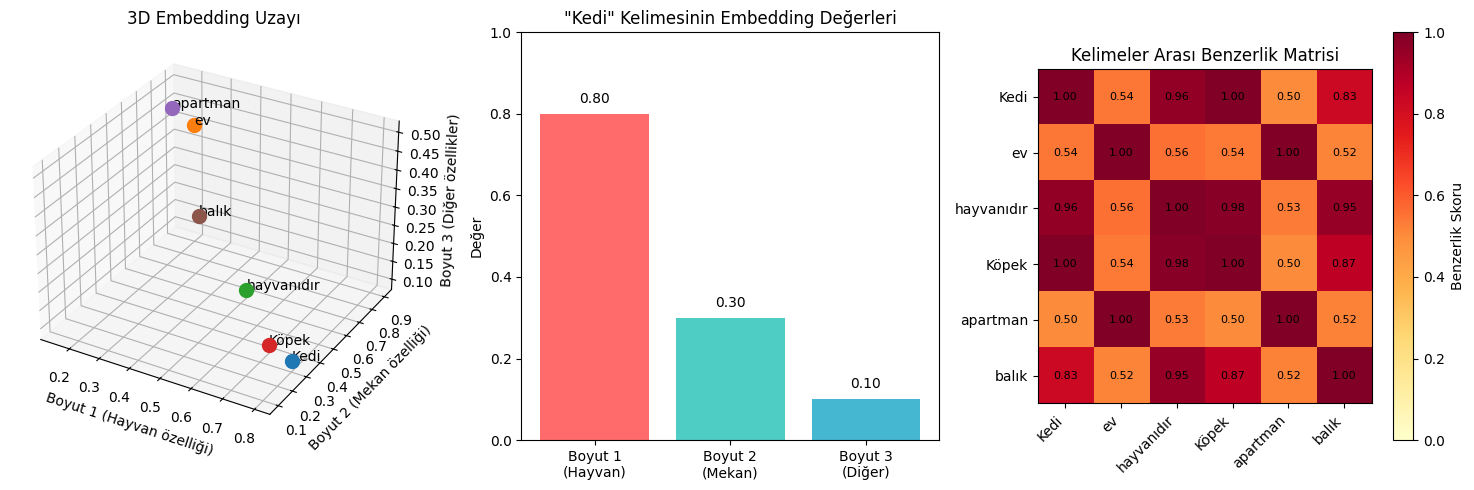

   - Örnek: 'Kedi' embedding: [0.8 0.3 0.1]

2. BOYUTLAR:
   - 'Kedi' ve 'Köpek' benzerliği: 0.997
   - 'Kedi' ve 'ev' benzerliği: 0.544
   - 'ev' ve 'apartman' benzerliği: 0.997



In [3]:

# Tüm kelimeleri birleştir
all_embeddings = {**embeddings, **additional_words}

# 1. 3D Görselleştirme
fig = plt.figure(figsize=(15, 5))

# Sol grafik: 3D scatter plot
ax1 = fig.add_subplot(131, projection='3d')

for word, vector in all_embeddings.items():
    # Her kelimeyi 3D uzayda bir nokta olarak çiz
    ax1.scatter(vector[0], vector[1], vector[2], s=100)
    ax1.text(vector[0], vector[1], vector[2], word, fontsize=10)

ax1.set_xlabel('Boyut 1 (Hayvan özelliği)')
ax1.set_ylabel('Boyut 2 (Mekan özelliği)')
ax1.set_zlabel('Boyut 3 (Diğer özellikler)')
ax1.set_title('3D Embedding Uzayı')

# 2. Embedding değerlerini bar chart olarak göster
ax2 = fig.add_subplot(132)

# "Kedi" kelimesinin embedding değerlerini göster
word_to_show = "Kedi"
vector = embeddings[word_to_show]
dimensions = ['Boyut 1\n(Hayvan)', 'Boyut 2\n(Mekan)', 'Boyut 3\n(Diğer)']

bars = ax2.bar(dimensions, vector, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_ylabel('Değer')
ax2.set_title(f'"{word_to_show}" Kelimesinin Embedding Değerleri')
ax2.set_ylim([0, 1])

# Her bar'ın üstüne değeri yaz
for i, (bar, val) in enumerate(zip(bars, vector)):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 0.02, 
             f'{val:.2f}', ha='center', va='bottom')

# 3. Kelimeler arası benzerlik matrisi (Cosine Similarity)
ax3 = fig.add_subplot(133)

# Cosine similarity hesaplama fonksiyonu
def cosine_similarity(v1, v2):
    """İki vektör arasındaki kosinüs benzerliğini hesaplar (0-1 arası)"""
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Benzerlik matrisini oluştur
words = list(all_embeddings.keys())
n = len(words)
similarity_matrix = np.zeros((n, n))

for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        similarity_matrix[i][j] = cosine_similarity(
            all_embeddings[word1], 
            all_embeddings[word2]
        )

# Heatmap çiz
im = ax3.imshow(similarity_matrix, cmap='YlOrRd', vmin=0, vmax=1)
ax3.set_xticks(range(n))
ax3.set_yticks(range(n))
ax3.set_xticklabels(words, rotation=45, ha='right')
ax3.set_yticklabels(words)
ax3.set_title('Kelimeler Arası Benzerlik Matrisi')

# Hücrelere değerleri yaz
for i in range(n):
    for j in range(n):
        text = ax3.text(j, i, f'{similarity_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=ax3, label='Benzerlik Skoru')

plt.tight_layout()
plt.savefig('llm_embeddings_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 60)
print("   - Örnek: 'Kedi' embedding:", embeddings["Kedi"])
print("\n2. BOYUTLAR:")
print(f"   - 'Kedi' ve 'Köpek' benzerliği: {cosine_similarity(all_embeddings['Kedi'], all_embeddings['Köpek']):.3f}")
print(f"   - 'Kedi' ve 'ev' benzerliği: {cosine_similarity(all_embeddings['Kedi'], all_embeddings['ev']):.3f}")
print(f"   - 'ev' ve 'apartman' benzerliği: {cosine_similarity(all_embeddings['ev'], all_embeddings['apartman']):.3f}")
print("\n" + "=" * 60)


###### Embedding ile kelime veya cümleler sayısal vektörlere dönüştürülür.
###### Anlamsal olarak benzer kelimeler yakın vektörlere sahiptir.
###### Her boyut farklı anlamsal özellikleri temsil eder.

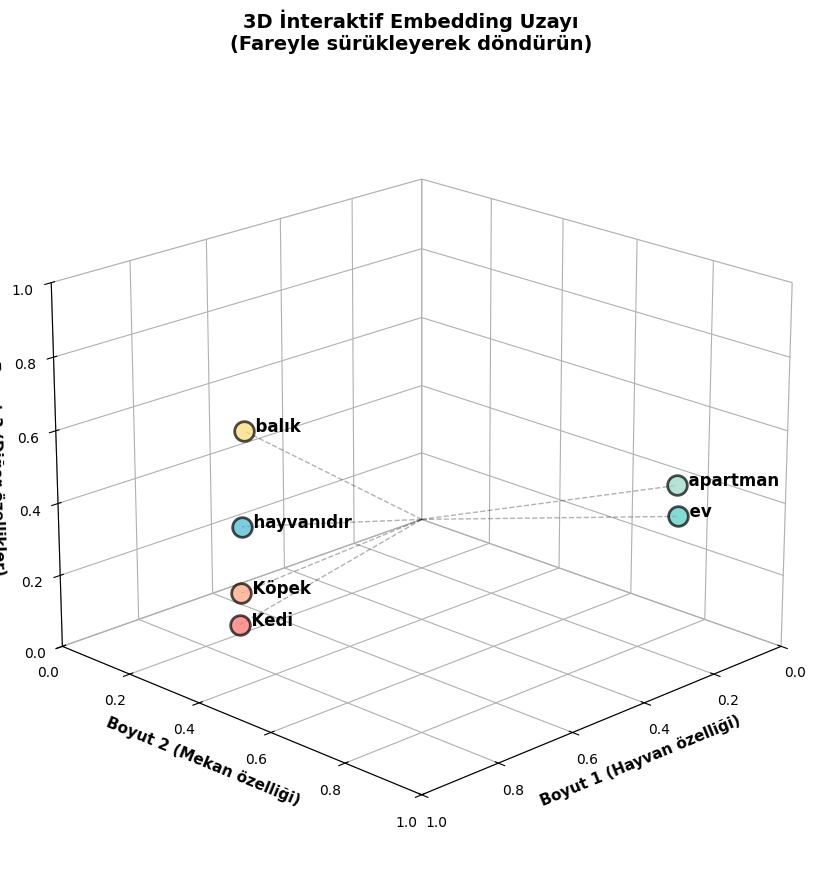

In [4]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Her kelime için farklı renk kullan
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

# Kelimeleri 3D uzayda çiz
for idx, (word, vector) in enumerate(all_embeddings.items()):
    # Noktayı çiz (daha büyük boyut)
    ax.scatter(vector[0], vector[1], vector[2], 
               s=200, 
               c=[colors[idx]], 
               alpha=0.7,
               edgecolors='black',
               linewidth=2)
    
    # Kelime etiketini ekle
    ax.text(vector[0], vector[1], vector[2], 
            f'  {word}', 
            fontsize=12, 
            fontweight='bold')
    
    # Orijinden noktaya çizgi çek (vektörü görselleştir)
    ax.plot([0, vector[0]], [0, vector[1]], [0, vector[2]], 
            'k--', 
            alpha=0.3, 
            linewidth=1)

# Eksenleri etiketle
ax.set_xlabel('Boyut 1 (Hayvan özelliği)', fontsize=11, fontweight='bold')
ax.set_ylabel('Boyut 2 (Mekan özelliği)', fontsize=11, fontweight='bold')
ax.set_zlabel('Boyut 3 (Diğer özellikler)', fontsize=11, fontweight='bold')
ax.set_title('3D İnteraktif Embedding Uzayı\n(Fareyle sürükleyerek döndürün)', 
             fontsize=14, 
             fontweight='bold',
             pad=20)

# Grid ekle
ax.grid(True, alpha=0.3)

# Eksen limitlerini ayarla
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Arka plan rengini ayarla
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Başlangıç görünüm açısını ayarla
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM

c:\Users\aliil\anaconda3\envs\llm_v1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it")
model = AutoModelForCausalLM.from_pretrained("google/gemma-3-1b-it")
# tokenizer ve model yüklendi

In [ ]:
model
# embed_tokens: Metin girdilerini sayısal vektörlere çeviren embedding katmanı
# 262144: kelime (vocab) boyutu, 1152: embedding boyutu
# layers: 26 x Gemma3DecoderLayer, Model 26 adet Transformer decoder katmanından oluşuyor.
# rotary_emb / rotary_emb_local: Bu katmanlar RoPE (Rotary Position Embedding) yöntemini uygular.

Gemma3ForCausalLM(
  (model): Gemma3TextModel(
    (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 1152, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma3DecoderLayer(
        (self_attn): Gemma3Attention(
          (q_proj): Linear(in_features=1152, out_features=1024, bias=False)
          (k_proj): Linear(in_features=1152, out_features=256, bias=False)
          (v_proj): Linear(in_features=1152, out_features=256, bias=False)
          (o_proj): Linear(in_features=1024, out_features=1152, bias=False)
          (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
          (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
        )
        (mlp): Gemma3MLP(
          (gate_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (up_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (down_proj): Linear(in_features=6912, out_features=1152, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma3RMSNorm((11

In [7]:
exp_text = "Kedi ev hayvanıdır."

In [8]:
tokenizer.encode(exp_text)

[2, 236855, 13814, 959, 175544, 82944, 236761]

In [11]:
print(tokenizer.pad_token, tokenizer.pad_token_id)

<pad> 0


In [ ]:
import torch
from torch.utils.data import DataLoader
from dataloader import TextDataset
# text verisini okuyup tokenlere dönüştürme

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
stride = 4 #ir sonraki pencereye geçerken ne kadar kaydırma yapılacağı 
context_length = 12 # Claude 3.5 Sonnet / Haiku 200,000, lama 2 (Meta) 4,096 , her bir input dizisinin maksimum uzunluğu (örnek olarak 12 token)
def create_data_loader(token_ids: list, context_length: int, stride: int,
                       batch_size: int, shuffle: bool = True, device: str = "cpu"):
  dataset = TextDataset(token_ids, context_length, stride)
  dataloader = DataLoader(
      dataset,
      batch_size=batch_size,
      shuffle=shuffle,
      generator=torch.Generator(device=device)
    )
  
  return dataloader

In [25]:
with open(r"exp_text.txt", "r") as f:
  text = f.read()

text

'Artificial intelligence (AI) is transforming the world at an unprecedented pace. From self-driving cars to personalized healthcare recommendations, AI-powered technologies are reshaping industries and redefining how we live and work. In education, AI tools help identify student learning patterns and customize content accordingly. In finance, algorithms detect fraudulent transactions in real-time. AI is also being used in agriculture to monitor crop health and optimize irrigation. However, with great power comes great responsibility. Concerns around data privacy, bias in decision-making, and job displacement are growing. To ensure ethical use, it’s essential for governments, organizations, and developers to collaborate on transparent policies. As AI continues to evolve, a balanced approach will help society maximize benefits while minimizing risks.'

In [ ]:
token_ids = tokenizer.encode(text) # "Artificial intelligence" → [2, 118870, 124002, 568, ...] save ids
ids_text = ""

for token_id in token_ids:
  ids_text += f"{token_id} "

with open("token_ids.txt", "w") as f:
  f.write(ids_text)

In [31]:
train_data_loader = create_data_loader(token_ids, context_length, stride, 1, False)

len(train_data_loader)

34

In [ ]:
# Örnek birkaç batch gösterimi
i = 0
for batch in enumerate(train_data_loader):
  print(batch)
  i += 1
  if i > 2:
    break

(0, [tensor([[     2, 118870,  14020,    568,  12553, 236768,    563,  43413,    506,
           1902,    657,    614]]), tensor([[118870,  14020,    568,  12553, 236768,    563,  43413,    506,   1902,
            657,    614,  35995]])])
(1, [tensor([[ 12553, 236768,    563,  43413,    506,   1902,    657,    614,  35995,
          17723, 236761,   4934]]), tensor([[236768,    563,  43413,    506,   1902,    657,    614,  35995,  17723,
         236761,   4934,   1265]])])
(2, [tensor([[   506,   1902,    657,    614,  35995,  17723, 236761,   4934,   1265,
         236772,  79465,   9371]]), tensor([[  1902,    657,    614,  35995,  17723, 236761,   4934,   1265, 236772,
          79465,   9371,    531]])])
